# Non-interacting band structure

In [1]:
import numpy as np
from quant_met import geometry, mean_field, plotting

[[ 2.41839915  0.        ]
 [ 1.20919958  2.0943951 ]
 [-1.20919958  2.0943951 ]]
[1.81379936 1.04719755]
[[1.81379936 1.04719755]
 [1.20919958 0.6981317 ]
 [0.60459979 0.34906585]
 [0.         0.        ]
 [0.60459979 0.        ]
 [1.20919958 0.        ]
 [1.81379936 0.        ]
 [2.41839915 0.        ]
 [2.11609926 0.52359878]]
     band_0      wx_0    band_1          wx_1    band_2      wx_2
0  1.495110 -0.495287  2.519802  9.900836e-01  3.505089 -0.494797
1  0.765065 -0.498339  2.500000  9.966778e-01  4.234935 -0.498339
2 -0.147669 -0.499259  2.460057  9.985722e-01  5.147612 -0.499313
3 -0.501700 -0.499416  2.440067  9.988884e-01  5.501634 -0.499472
4 -0.233911 -0.499303  2.455419  9.986607e-01  5.233851 -0.499358
5  0.497489 -0.498737  2.490025  9.975060e-01  4.502486 -0.498769
6  1.495110 -0.495287  2.519802  9.900836e-01  3.505089 -0.494797
7  2.413881 -0.148340  2.500000  1.972152e-29  2.616119  0.148340
8  1.761369 -0.491558  2.524189  9.816025e-01  3.239083 -0.490044


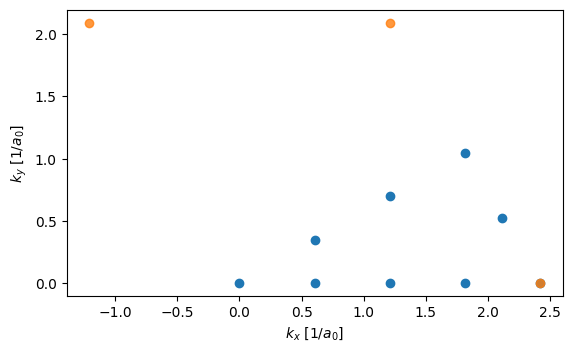

In [5]:
graphene_lattice = geometry.Graphene(lattice_constant=np.sqrt(3))
n = 10  # number of points across the whole k space path
band_path, band_path_plot, ticks, labels = graphene_lattice.generate_high_symmetry_path(
    number_of_points=n
)

print(graphene_lattice.bz_corners)
print(graphene_lattice.M)
print(band_path)

delta = np.array([0, 0, 0])

BZ_path_plot = plotting.scatter_into_bz(graphene_lattice.bz_corners, band_path)

egx_h = mean_field.EGXHamiltonian(
    hopping_gr=1,
    hopping_x=0.01,
    hopping_x_gr_a=0.1,
    lattice_constant=graphene_lattice.lattice_constant,
    chemical_potential=-2.5,
    hubbard_int_gr=1,
    hubbard_int_x=1,
)

band_structure = egx_h.calculate_bandstructure(
    band_path, overlaps=(np.array([0, 0, 1]), np.array([1, 0, 0]))
)
print(band_structure)

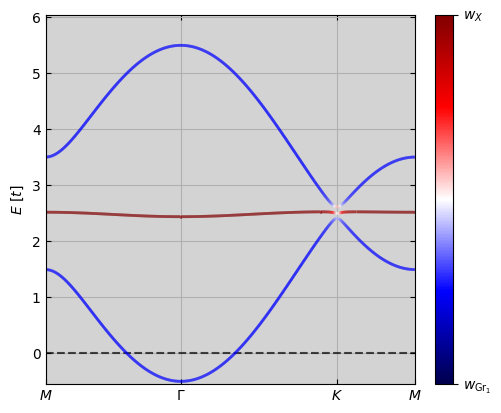

In [3]:
fig = plotting.plot_bandstructure(
    bands=band_structure[["band_0", "band_1", "band_2"]].to_numpy().T,
    overlaps=band_structure[["wx_0", "wx_1", "wx_2"]].to_numpy().T,
    overlap_labels=[r"$w_{\mathrm{Gr}_1}$", r"$w_X$"],
    k_point_list=band_path_plot,
    labels=labels,
    ticks=ticks,
)